In [1]:
import sys
!{sys.executable} -m pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 3.4 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 KB 5.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 7.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 7.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.1 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 MB 7.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 8.3 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 6.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 8.2 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 KB 5.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!{sys.executable} -m pip install -U stlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 KB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.4/210.4 KB 3.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 1.7 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 6.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.4/217.4 MB 4.2 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 KB 4.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 4.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.2/192.2 KB 3.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 4.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 5.0 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.9/193.9 KB 4.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━

In [17]:
import scanpy as sc
import stlearn as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dpi5_female = sc.read_visium("../data/infarto_5dpi_hembra/")

/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [6]:
dpi5_female

AnnData object with n_obs × n_vars = 1429 × 22056
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [7]:
dpi5_female.var_names_make_unique()
dpi5_female.var["mt"] = dpi5_female.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(dpi5_female, qc_vars=["mt"], inplace=True)
dpi5_female

AnnData object with n_obs × n_vars = 1429 × 22056
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

<AxesSubplot:xlabel='n_genes_by_counts'>

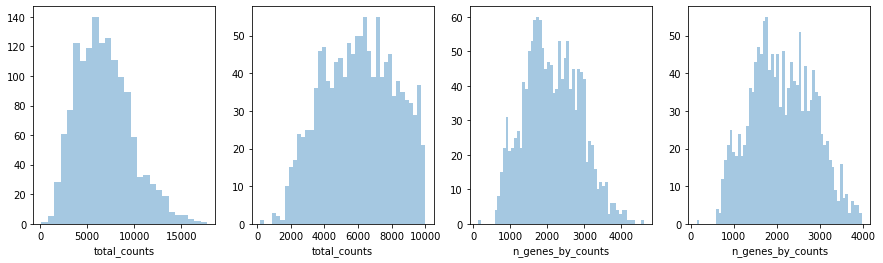

In [9]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(dpi5_female.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(dpi5_female.obs["total_counts"][dpi5_female.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(dpi5_female.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(dpi5_female.obs["n_genes_by_counts"][dpi5_female.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

In [10]:
sc.pp.filter_cells(dpi5_female, min_counts=2000)
sc.pp.filter_cells(dpi5_female, max_counts=15000)
dpi5_female = dpi5_female[dpi5_female.obs["pct_counts_mt"] < 50]
print(f"#cells after MT filter: {dpi5_female.n_obs}")
sc.pp.filter_genes(dpi5_female, min_cells=10)

#cells after MT filter: 1392


/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


In [11]:
sc.pp.normalize_total(dpi5_female, inplace=True)
sc.pp.log1p(dpi5_female)
sc.pp.highly_variable_genes(dpi5_female, flavor="seurat", n_top_genes=3000)

In [12]:
sc.pp.pca(dpi5_female)
sc.pp.neighbors(dpi5_female)
sc.tl.umap(dpi5_female)
sc.tl.leiden(dpi5_female, key_added="clusters")

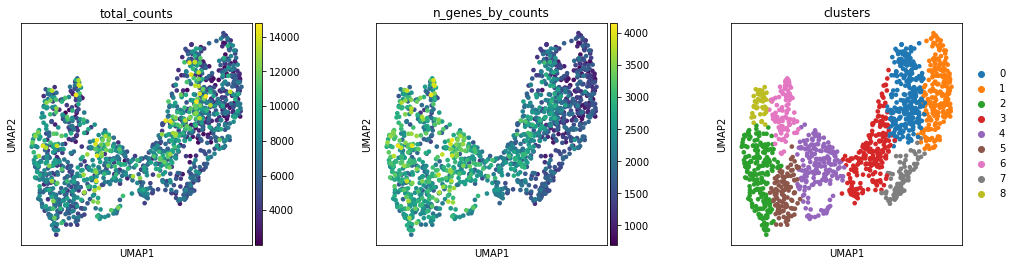

In [13]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(dpi5_female, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

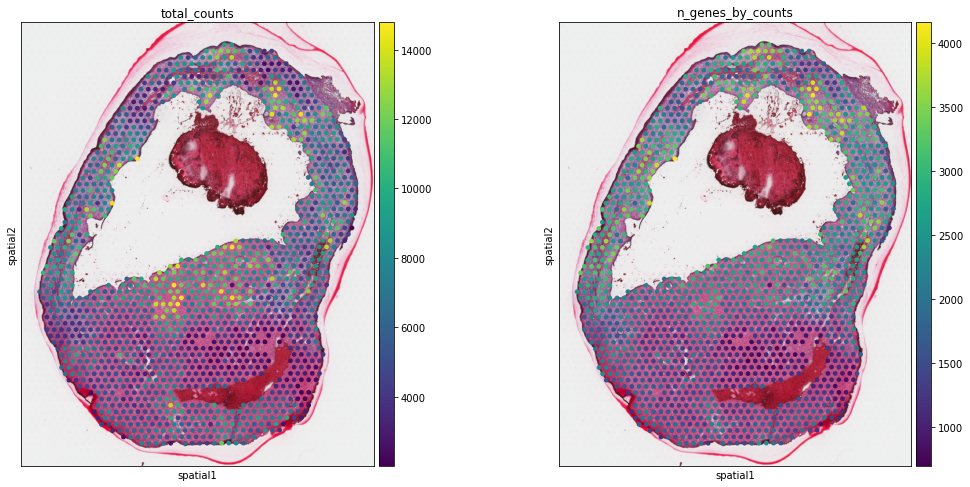

In [14]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(dpi5_female, img_key="hires", color=["total_counts", "n_genes_by_counts"])

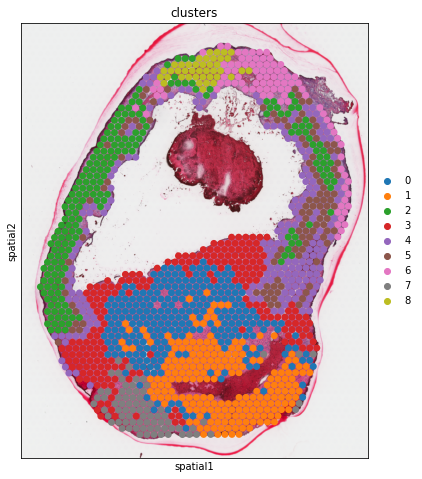

In [15]:
sc.pl.spatial(dpi5_female, img_key="hires", color="clusters", size=1.5)

# STlearn

In [21]:
# Convert AnnData object to work with stLearn
dpi5_f = sc.read_visium("../data/infarto_5dpi_hembra/")
dpi5_f = st.convert_scanpy(dpi5_f)
dpi5_f

/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 1429 × 22056
    obs: 'in_tissue', 'array_row', 'array_col', 'imagecol', 'imagerow'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [22]:
# Save raw_count
dpi5_f.layers["raw_count"] = dpi5_f.X
# Preprocessing
st.pp.filter_genes(dpi5_f,min_cells=3)
st.pp.normalize_total(dpi5_f)
st.pp.log1p(dpi5_f)
# Keep raw data
dpi5_f.raw = dpi5_f
st.pp.scale(dpi5_f)

Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X


In [23]:
# Run PCA
st.em.run_pca(dpi5_f,n_comps=50,random_state=0)
# Tiling image
st.pp.tiling(dpi5_f,out_path="tiling",crop_size = 40)
# Using Deep Learning to extract feature
st.pp.extract_feature(dpi5_f)
# Apply stSME spatial-PCA option
st.spatial.morphology.adjust(dpi5_f,use_data="X_pca",radius=50,method="mean")
st.pp.neighbors(dpi5_f,n_neighbors=25,use_rep='X_pca_morphology',random_state=0)
st.tl.clustering.louvain(dpi5_f,random_state=0)

PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']


Tiling image: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ [ time left: 00:00 ]
2022-05-02 17:09:56.039313: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


94781440/94765736 [==============================] - 9s 0us/step


Extract feature:   7%|████████▊                                                                                                                         [ time left: 00:55 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
Extract feature:   7%|█████████                                                                                                                         [ time left: 02:53 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This i

Extract feature:   9%|███████████▊                                                                                                                      [ time left: 01:41 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  10%|█████████████▎                                                                                                                    [ time left: 01:24 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  11%|██████████████▋                                                                                                                   [ time left: 01:23 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  13%|████████████████▏                                                                                                                 [ time left: 01:43 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  14%|█████████████████▌                                                                                                                [ time left: 01:24 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  15%|███████████████████                                                                                                               [ time left: 01:31 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  16%|████████████████████▍                                                                                                             [ time left: 01:55 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  17%|█████████████████████▉                                                                                                            [ time left: 01:25 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  18%|███████████████████████▍                                                                                                          [ time left: 01:36 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  19%|████████████████████████▊                                                                                                         [ time left: 01:21 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  20%|██████████████████████████▎                                                                                                       [ time left: 01:23 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  21%|███████████████████████████▋                                                                                                      [ time left: 01:46 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  23%|█████████████████████████████▏                                                                                                    [ time left: 01:10 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  24%|██████████████████████████████▌                                                                                                   [ time left: 01:15 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  25%|████████████████████████████████                                                                                                  [ time left: 01:07 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  26%|█████████████████████████████████▍                                                                                                [ time left: 01:08 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  27%|██████████████████████████████████▉                                                                                               [ time left: 01:23 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  28%|████████████████████████████████████▍                                                                                             [ time left: 01:04 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  29%|█████████████████████████████████████▊                                                                                            [ time left: 01:09 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  30%|███████████████████████████████████████▎                                                                                          [ time left: 01:32 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  32%|████████████████████████████████████████▋                                                                                         [ time left: 01:02 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  33%|██████████████████████████████████████████▏                                                                                       [ time left: 01:13 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  34%|███████████████████████████████████████████▌                                                                                      [ time left: 00:58 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  35%|█████████████████████████████████████████████                                                                                     [ time left: 01:00 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  36%|██████████████████████████████████████████████▍                                                                                   [ time left: 01:32 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  37%|███████████████████████████████████████████████▉                                                                                  [ time left: 01:02 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  38%|█████████████████████████████████████████████████▍                                                                                [ time left: 01:09 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  39%|██████████████████████████████████████████████████▊                                                                               [ time left: 01:03 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  41%|████████████████████████████████████████████████████▎                                                                             [ time left: 01:04 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  42%|█████████████████████████████████████████████████████▋                                                                            [ time left: 01:12 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  43%|███████████████████████████████████████████████████████▏                                                                          [ time left: 00:55 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  44%|████████████████████████████████████████████████████████▌                                                                         [ time left: 00:56 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  45%|██████████████████████████████████████████████████████████                                                                        [ time left: 01:14 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  46%|███████████████████████████████████████████████████████████▍                                                                      [ time left: 00:51 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  47%|████████████████████████████████████████████████████████████▉                                                                     [ time left: 00:58 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  48%|██████████████████████████████████████████████████████████████▍                                                                   [ time left: 00:47 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  49%|███████████████████████████████████████████████████████████████▊                                                                  [ time left: 00:49 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  51%|█████████████████████████████████████████████████████████████████▎                                                                [ time left: 01:12 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  52%|██████████████████████████████████████████████████████████████████▋                                                               [ time left: 00:47 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  53%|████████████████████████████████████████████████████████████████████▏                                                             [ time left: 00:52 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  54%|█████████████████████████████████████████████████████████████████████▌                                                            [ time left: 00:43 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  55%|███████████████████████████████████████████████████████████████████████                                                           [ time left: 00:45 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  56%|████████████████████████████████████████████████████████████████████████▍                                                         [ time left: 00:49 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  57%|█████████████████████████████████████████████████████████████████████████▉                                                        [ time left: 00:39 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  58%|███████████████████████████████████████████████████████████████████████████▍                                                      [ time left: 00:42 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  60%|████████████████████████████████████████████████████████████████████████████▊                                                     [ time left: 00:54 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  61%|██████████████████████████████████████████████████████████████████████████████▎                                                   [ time left: 00:37 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  62%|███████████████████████████████████████████████████████████████████████████████▋                                                  [ time left: 00:42 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  63%|█████████████████████████████████████████████████████████████████████████████████▏                                                [ time left: 00:34 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  64%|██████████████████████████████████████████████████████████████████████████████████▌                                               [ time left: 00:34 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  65%|████████████████████████████████████████████████████████████████████████████████████                                              [ time left: 00:46 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  66%|█████████████████████████████████████████████████████████████████████████████████████▍                                            [ time left: 00:31 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  67%|██████████████████████████████████████████████████████████████████████████████████████▉                                           [ time left: 00:33 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  69%|████████████████████████████████████████████████████████████████████████████████████████▍                                         [ time left: 00:29 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  70%|█████████████████████████████████████████████████████████████████████████████████████████▊                                        [ time left: 00:30 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  71%|███████████████████████████████████████████████████████████████████████████████████████████▎                                      [ time left: 00:33 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  72%|████████████████████████████████████████████████████████████████████████████████████████████▋                                     [ time left: 00:26 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  73%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                   [ time left: 00:27 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                  [ time left: 00:35 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████                                 [ time left: 00:23 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                               [ time left: 00:27 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                              [ time left: 00:20 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                            [ time left: 00:21 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                           [ time left: 00:27 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         [ time left: 00:17 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        [ time left: 00:18 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      [ time left: 00:15 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     [ time left: 00:15 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                    [ time left: 00:17 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  [ time left: 00:14 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 [ time left: 00:14 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               [ time left: 00:17 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              [ time left: 00:11 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            [ time left: 00:11 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           [ time left: 00:07 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         [ time left: 00:06 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        [ time left: 00:07 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       [ time left: 00:04 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     [ time left: 00:03 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    [ time left: 00:02 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  [ time left: 00:01 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Extract feature: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ [ time left: 00:00 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/image_preprocessing/feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

The morphology feature is added to adata.obsm['X_morphology']!


Adjusting data: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


The data adjusted by morphology is added to adata.obsm['X_pca_morphology']
Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 
Applying Louvain clustering ...
Louvain clustering is done! The labels are stored in adata.obs['louvain']


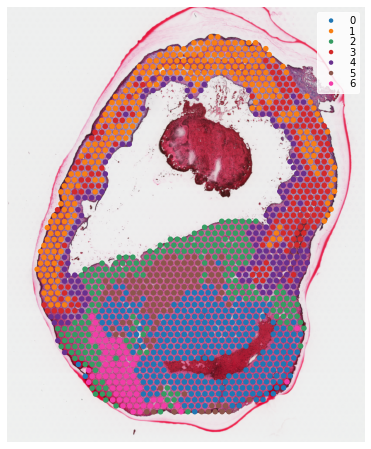

In [28]:
st.pl.cluster_plot(dpi5_f,use_label="louvain",image_alpha=1,size=30)

In [29]:
dpi5_f.uns["iroot"] = st.spatial.trajectory.set_root(dpi5_f,use_label="louvain",cluster=3,use_raw=True)
st.spatial.trajectory.pseudotime(dpi5_f,eps=50,use_rep="X_pca",use_label="louvain")

/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/spatials/clustering/localization.py:45: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  subclusters = pd.Series()
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/spatials/clustering/localization.py:60: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subclusters = subclusters.append(tmp["sub_labels"])
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/spatials/clustering/localization.py:60: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subclusters = subclusters.append(tmp["sub_labels"])
/Users/medinils

Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 
All available trajectory paths are stored in adata.uns['available_paths'] with length < 4 nodes


/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/spatials/trajectory/pseudotime.py:196: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  v = np.array(list(dic.values()))
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/spatials/trajectory/pseudotime.py:196: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  v = np.array(list(dic.values()))


In [33]:
st.spatial.trajectory.pseudotimespace_global(dpi5_f,use_label="louvain",list_clusters=["2","4"])

Screening PTS global graph...


Screening:   0%|                                                                                                                                            [ time left: ? ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/spatials/trajectory/weight_optimization.py:32: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.adjacency_matrix(
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/spatials/trajectory/weight_optimization.py:32: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.adjacency_matrix(
Screening:   2%|██▋                                                                                                                                     [ time left: 00:06 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/spatials/tra

/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/spatials/trajectory/weight_optimization.py:32: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.adjacency_matrix(
Screening:  24%|████████████████████████████████                                                                                                        [ time left: 00:05 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/spatials/trajectory/weight_optimization.py:32: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.adjacency_matrix(
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/spatials/trajectory/weight_optimization.py:32: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.adjacency_matrix(
Screening:  

/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/spatials/trajectory/weight_optimization.py:32: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.adjacency_matrix(
Screening:  69%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                          [ time left: 00:01 ]/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/spatials/trajectory/weight_optimization.py:32: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.adjacency_matrix(
/Users/medinils/Desktop/circulation/Circulation/STlearn/STlearn/lib/python3.8/site-packages/stlearn/spatials/trajectory/weight_optimization.py:32: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.adjacency_matrix(
Screening:  

Calculate the graph dissimilarity using Laplacian matrix...


Calculating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


The optimized weighting is: 0.83
Start to construct the trajectory: 4 -> 2


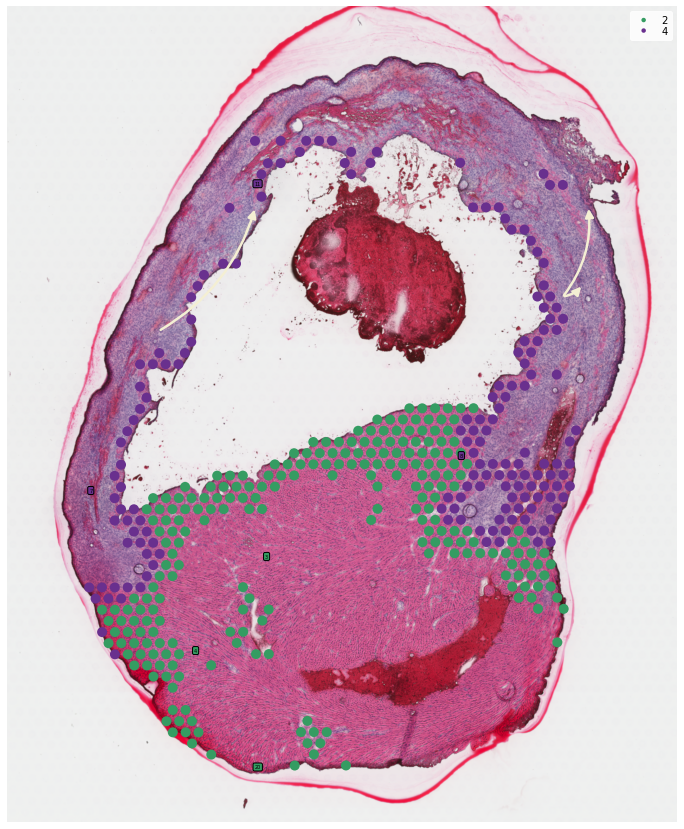

In [52]:
st.pl.cluster_plot(dpi5_f,use_label="louvain",show_trajectories=True,list_clusters=["2","4"],figsize= [15,15],show_subcluster=True,size=100)


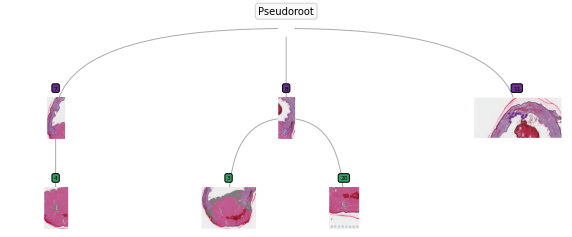

In [35]:
st.pl.trajectory.tree_plot(dpi5_f)

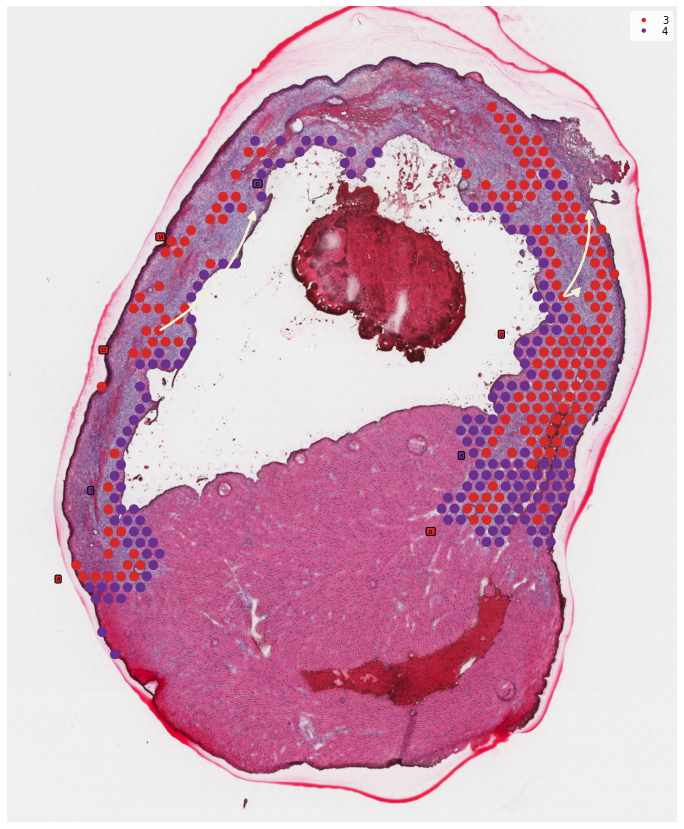

In [50]:
#st.spatial.trajectory.pseudotimespace_global(dpi5_f,use_label="louvain",list_clusters=["3","4"])
st.pl.cluster_plot(dpi5_f,use_label="louvain",show_trajectories=True,list_clusters=["3","4"],figsize= [15,15],show_subcluster=True,size=100)


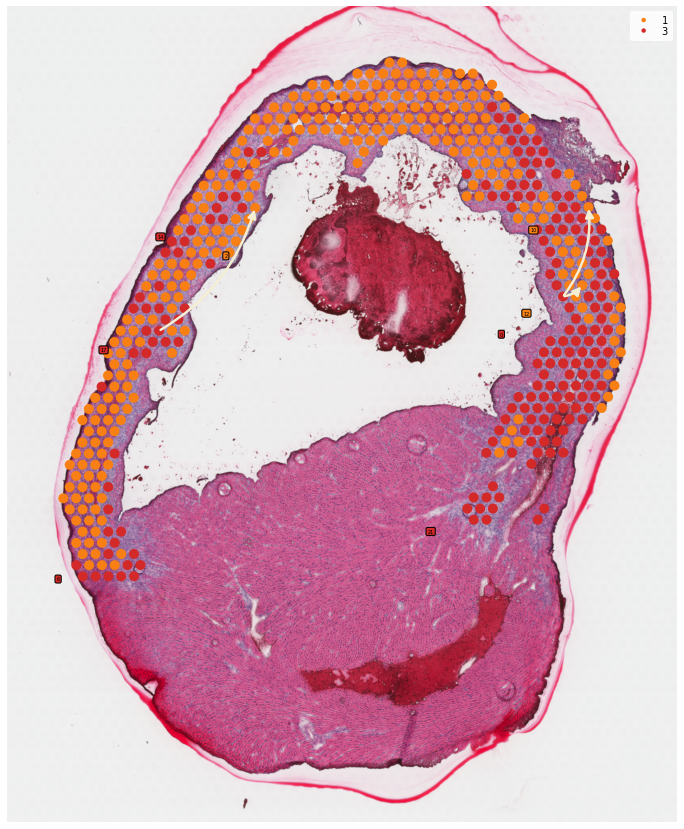

In [49]:
#st.spatial.trajectory.pseudotimespace_global(dpi5_f,use_label="louvain",list_clusters=["3","1"])
st.pl.cluster_plot(dpi5_f,use_label="louvain",show_trajectories=True,list_clusters=["3","1"],figsize= [15,15],show_subcluster=True,size=100)


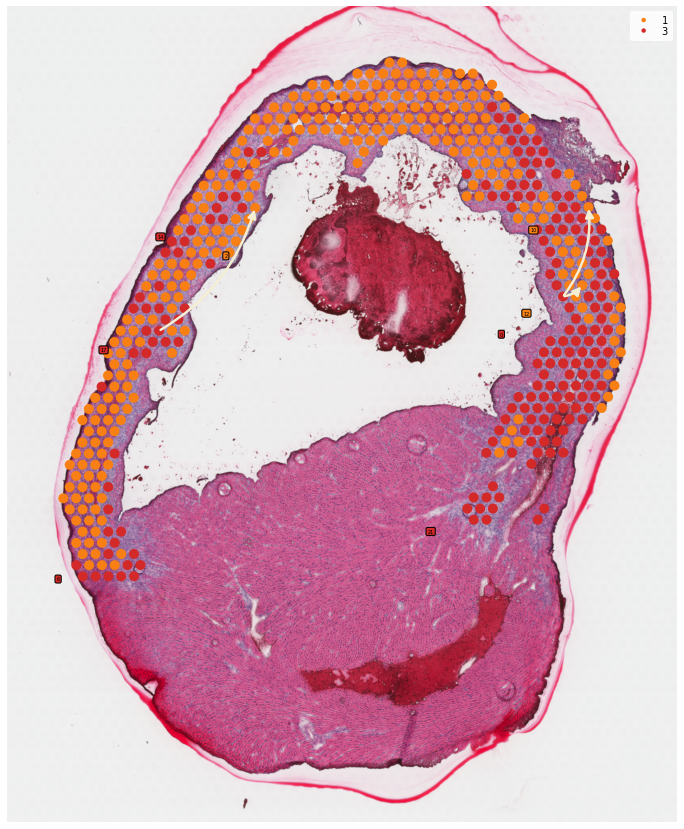

In [54]:
st.pl.cluster_plot(dpi5_f,use_label="louvain",show_trajectories=True,list_clusters=["3","1"],figsize= [15,15],show_subcluster=True,size=100)
